# **1. Adaboost - Əsas Anlayışlar ⚡**

Adaboost, yəni **Adaptive Boosting**, maşın öyrənməsində **boosting** üsullarının ən məşhur modellərindən biridir. Əsas məqsədi, çox zəif öyrənən modelləri (weak learners) birləşdirərək **güclü bir model** yaratmaqdır.


## **1.1 Adaboost nədir? (Adaptive Boosting) 🧩**

- Adaboost bir **ensemble learning** üsuludur. Ensemble learning: bir neçə modelin birləşdirilərək daha yaxşı nəticə verməsi deməkdir.
- **Adaptive** adlandırılır, çünki model iterativ olaraq öyrəndikcə əvvəlki səhvlərə diqqət yetirir və onları düzəltməyə çalışır.
- Sadə dillə desək:
  1. İlk weak learner səhv etdikdə, növbəti learner bu səhvlərə daha çox fokuslanır.
  2. Nəticədə modelin ümumi performansı artır.  

**Qısa nümunə:**
Tutaq ki, biz spam e-mailləri təsnif etmək istəyirik. İlk model yalnız 70% düzgün təsnif etdi. Adaboost növbəti modelə daha çox diqqəti səhv təsnif edilmiş e-maillərə verir və nəticədə son model daha yüksək dəqiqliklə işləyir. 📧

## **1.2 Weak Learner və Strong Learner anlayışı 💪**

- **Weak learner:** 0.5-dən bir az yüksək performans verən model (çox sadə model).  
  - Məsələn, **Decision Stump** (bir qərar düyünü ilə ağac).  
- **Strong learner:** Bir neçə weak learner birləşdirilərək yüksək performans əldə edən model.  

**Intuitiv olaraq:** Weak learnerlər **kiçik “zəif mərmi”** kimidir, amma doğru istiqamətdə çox istifadə edilsə, güclü bir nəticə əldə edilir. 🎯  

## **1.3 Niyə Boosting Üsullarına Ehtiyac Var? 🔍**

- Bəzən **sadə modellər** datasetin kompleksliyini tam öyrənə bilmir.
- Boosting üsulları ilə:
  1. Hər iterasiyada model səhvləri öyrənir.
  2. Zəif modellər birləşdirilərək **overfitting riski azaldılır**.
- Əksinə, **bagging** üsullarında (məsələn Random Forest) weak learnerlar paralel işləyir, boosting isə **serial və adaptiv** işləyir.

## **1.4 Bagging vs Boosting Fərqi ⚖️**

| Xüsusiyyət | Bagging | Boosting |
|------------|--------|---------|
| İş prinsipi | Paralel weak learnerlar | Serial weak learnerlar |
| Səhvlərə yanaşma | Hər model müstəqil öyrənir | Səhvlər iterativ düzəldilir |
| Overfitting riski | Daha aşağı | Aşağı/orta, datasetə görə |
| Misal | Random Forest | Adaboost, Gradient Boosting |

💡 Yadda saxla: Bagging “ortalama ilə səhvləri azaldır”, Boosting isə “səhvləri iterativ düzəldir”.

## **Riyazi Görünüş 📐**

Weak learner $h_t(x)$ ilə iterativ olaraq ağırlıqlı səsvermə aparılır:  

$$
H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
$$

- $h_t(x)$ – t-ci weak learner  
- $\alpha_t$ – modelin ağırlığı (səhv nisbətinə görə təyin olunur)  
- $H(x)$ – final qərar  

Bu düstur **weak learner-ların necə güclü modelə çevrildiyini** göstərir.  


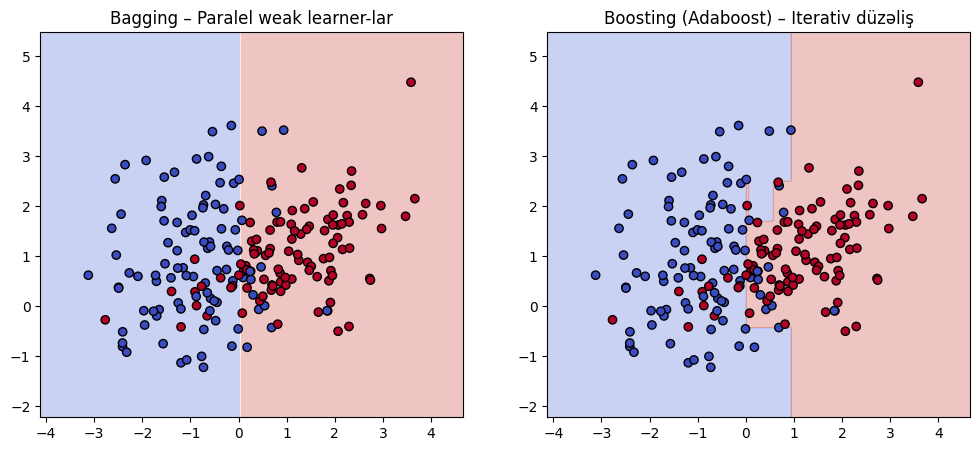

# **2. Adaboostun İş Prinsipi 🔄**

Adaboostun əsas gücü onun **iterativ və adaptiv öyrənmə prosesindən** gəlir. Hər bir iterasiyada model əvvəlki weak learnerin səhvlərinə fokuslanır və nəticədə zəif modellərdən güclü bir model yaradılır.

## **2.1 İterativ öyrənmə prosesi 🔁**

- Adaboost bir neçə weak learneri ardıcıl olaraq öyrədir.  
- Hər addımda:
  1. Mövcud modelin səhvləri qiymətləndirilir.  
  2. Səhv edilmiş nümunələrə daha yüksək weightlər verilir.  
  3. Növbəti weak learner bu weightlərə görə təlim edilir.  

**Sadə nümunə:**  
- İlk model 80% düzgün təsnif etdi.  
- Növbəti model qalan 20% səhvlərə diqqət yetirir və onları düzəltməyə çalışır.  
- Bu proses **$T$ iterasiya** qədər davam edir və weak learnerlər birləşdirilir.

## **2.2 Nümunələrə çəkilər (weights) təyin edilməsi ⚖️**

- Hər nümunəyə $w_i$ çəkisi verilir.  
- Başlanğıcda bütün nümunələrə eyni çəki: $w_i = \frac{1}{N}$ (N = nümunə sayı)  
- Hər iterasiyadan sonra səhv təsnif edilmiş nümunələrin çəkisi artırılır:  
$$
w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_t \cdot I(y_i \neq h_t(x_i))}
$$  
- $I(y_i \neq h_t(x_i))$ – əgər nümunə səhv təsnif edilibsə 1, doğru təsnif edilibsə 0  
- $\alpha_t$ – t-ci weak learnerin ağırlığı  

💡 Bu proses **səhvlərə fokuslanma** prinsipini təmin edir.  

## **2.3 Weak learner seçimi və performansın qiymətləndirilməsi 🏃**

- Hər iterasiyada weak learner seçilir və **səhvləri çəkilər əsasında** qiymətləndirilir:  
$$
\epsilon_t = \frac{\sum_i w_i^{(t)} I(y_i \neq h_t(x_i))}{\sum_i w_i^{(t)}}
$$  
- $\epsilon_t$ – t-ci weak learnerin səhv nisbəti  
- Daha aşağı $\epsilon_t$ → daha yaxşı weak learner  
- Sonra bu səhv nisbətinə görə ağırlıq təyin olunur:  
$$
\alpha_t = \frac{1}{2} \ln \frac{1-\epsilon_t}{\epsilon_t}
$$

## **2.4 Əvvəlki modelin səhvlərinə fokuslanmaq 🔎**

- Əsas ideya: **hər yeni model əvvəlkilərin səhvlərini düzəldir**.  
- Səhv nümunələrin çəkiləri artırılır, düzgün təsnif edilənlərin çəkisi azalır.  
- Bu iterativ yeniləmə prosesi Adaboostu “adaptive” edir.  

**Vizual nümunə:**  
- 10 nümunə var, 3-ü səhv təsnif edilib.  
- Bu 3 nümunənin çəkisi artırılır və növbəti model onları düzgün təsnif etməyə çalışır.

## **2.5 Final modelin birləşdirilməsi (model ağırlıqlı səsvermə) 🏆**

- Iterasiyalardan sonra weak learnerlər **ağırlıqlı səsvermə** ilə birləşdirilir:  
$$
H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
$$  
- $\alpha_t$ – hər weak learnerin gücünü təmsil edir  
- $H(x)$ – final qərar (Strong Learner)  

💡 Nəticədə, zəif modellər birləşdirilərək **hər nümunə üçün daha dəqiq təsnifat** təmin edilir.

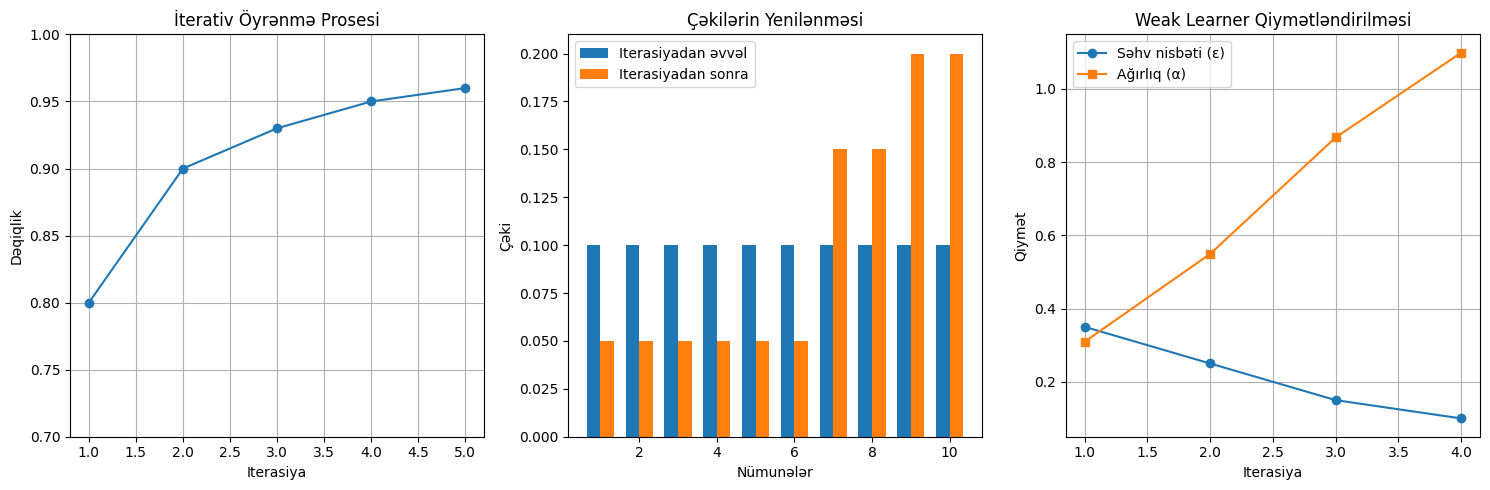

# **3. Weak Learner Seçimi 🏃**

Adaboostun performansı birbaşa **weak learnerların keyfiyyətinə** bağlıdır. Weak learnerlar çox sadə modellərdir, amma düzgün seçildikdə Adaboost onları güclü bir final modelə çevirir.

## **3.1 Adaboost üçün tipik weak learner: Decision Stump 🌳**

- **Decision Stump** – tək bir xüsusiyyət üzrə qərar verən çox sadə qərar ağacıdır.  
- Adaboostda ən çox istifadə olunan weak learner budur.  
- Əsas ideya: hər iterasiyada **yalnız bir xüsusiyyət üzrə bölünmə** edərək səhvləri azaldır.  

**Sadə nümunə:**  
- Datasetdə iki xüsusiyyət var: yaş və gəlir.  
- Decision Stump yalnız “yaş > 30?” sualına baxaraq 1 və ya 0 təsnif edə bilər.  
- Tək bir stump çox səhv edə bilər, amma Adaboost çoxlu stump birləşdirərək **daha güclü model** yaradır.

## **3.2 Weak learnerların məhdudiyyətləri və üstünlükləri ⚖️**

**Üstünlüklər:**  
- Sadə və sürətlidir.  
- Overfitting riski azdır.  
- Çox weak learner birləşdirildikdə güclü nəticə verir.  

**Məhdudiyyətlər:**  
- Təkbaşına yüksək dəqiqlik vermir.  
- Səs-küylü data və outlier-lərə həssasdır.  
- Çox kompleks nümunələri tək stump ilə öyrənmək çətindir.  

💡 Adaboost məhz **bu zəif modelləri iterativ birləşdirərək güclü edir**.

## **3.3 Digər model növləri ilə kombinasiya (SVM, Trees) 🔀**

- Adaboost yalnız Decision Stump ilə məhdudlaşmır.  
- Digər weak learnerlar da istifadə oluna bilər:  
  - Kiçik qərar ağacları (depth=2-3)  
  - Linear SVM  
  - Perceptron və ya digər sadə klassifikatorlar  
- Praktikada Decision Stump ən populyardır, çünki:  
  1. Sürətlidir  
  2. Parametrləri azdır  
  3. Boosting ilə yüksək dəqiqlik verir  

**İdeya:** Weak learner nə qədər sadə olsa da, Adaboost onu **iterativ və ağırlıqlı səsvermə** ilə güclü modelə çevirir.

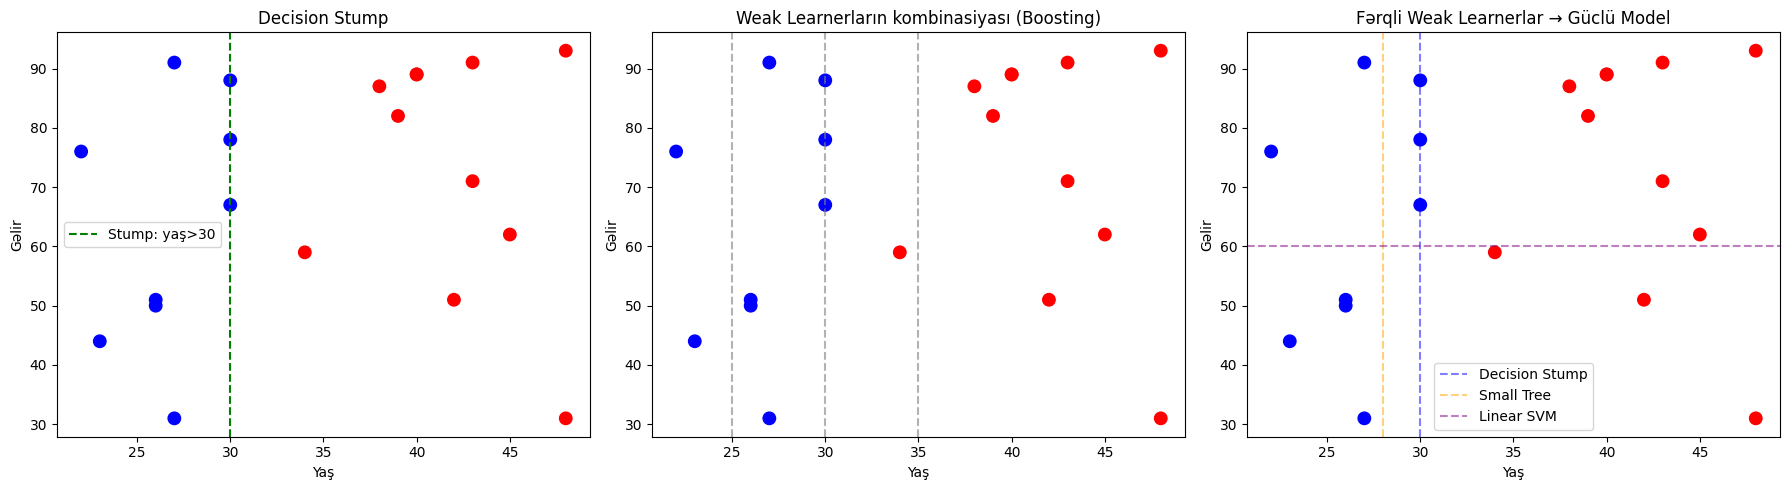

# **4. Adaboost Alqoritminin Riyazi Təsviri 📐**

## **4.1 Çəki yenilənməsi düsturu ⚖️**

- Hər nümunəyə $w_i$ çəkisi verilir.  
- Weak learnerin səhv nisbətinə görə çəkilər yenilənir:  
$$
w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_t \cdot I(y_i \neq h_t(x_i))}
$$  
- Əgər nümunə səhv təsnif edilibsə $I(y_i \neq h_t(x_i)) = 1$ , əks halda 0.  
- Bu düstur **səhvlərə fokuslanmanı** təmin edir.

## **4.2 Modelin ağırlığının təyini 🏋️**

- Weak learnerin səhv nisbətinə görə ağırlığı hesablanır:  
$$
\alpha_t = \frac{1}{2} \ln \frac{1-\epsilon_t}{\epsilon_t}
$$  
- $\epsilon_t$ – t-ci weak learnerin səhv nisbəti  
- Daha yaxşı weak learner → daha yüksək $\alpha_t$  
- Bu ağırlıq **final qərarda səsvermədə rol oynayır**.

## **4.3 Final qərar funksiyası 🏆**

- Bütün weak learnerlər ağırlıqlı səsvermə ilə birləşdirilir:  
$$
H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
$$  
- $H(x)$ – final güclü klassifikator  
- $\text{sign}$ funksiyası: müsbət → 1, mənfi → -1

## **4.4 Loss function və Adaboostun exponential loss ilə əlaqəsi 🔥**

- Adaboost **exponential loss** minimizasiyası əsasında işləyir:  
$$
L = \sum_{i=1}^{N} e^{-y_i F(x_i)}
$$  
- $F(x) = \sum_{t=1}^{T} \alpha_t h_t(x)$  
- Exponential loss səhv nümunələrin çəkilərini artırır və iterativ öyrənməyə səbəb olur.  
- Bu səbəbdən Adaboost səhvlərə həssas weak learnerləri effektiv birləşdirir.



## **4.5 Məntiqi addım-addım nümunə 🔢**

**Tutaq ki, datasetdə 4 nümunə var:**  

| Nümunə | Etiket $y$ | Başlanğıc çəki $w_i$ |
|--------|------------|--------------------|
| 1      | 1          | 0.25               |
| 2      | 1          | 0.25               |
| 3      | -1         | 0.25               |
| 4      | -1         | 0.25               |

**Addım 1:** Weak learner $h_1$ seçilir və səhv nisbəti:  
$$
\epsilon_1 = 0.25
$$

**Addım 2:** Weak learner ağırlığı:  
$$
\alpha_1 = \frac{1}{2} \ln \frac{1-0.25}{0.25} \approx 0.55
$$

**Addım 3:** Çəki yenilənməsi:  
- Səhv nümunələr: $w_i^{(2)} = 0.25 \cdot e^{0.55} \approx 0.44$  
- Düzgün nümunələr: $w_i^{(2)} = 0.25 \cdot e^{0} = 0.25$  
- Yeni çəkilər normallaşdırılır ki, cəmi 1 olsun.  

**Addım 4:** Növbəti weak learner $h_2$ əvvəlki səhvlərə fokuslanır və eyni proses təkrarlanır.  

**Addım 5:** Sonunda final qərar:  
$$
H(x) = \text{sign}(\alpha_1 h_1(x) + \alpha_2 h_2(x) + \dots)
$$  

💡 Nəticədə zəif modellər **iterativ şəkildə səhvləri düzəldərək** güclü bir modelə çevrilir.  


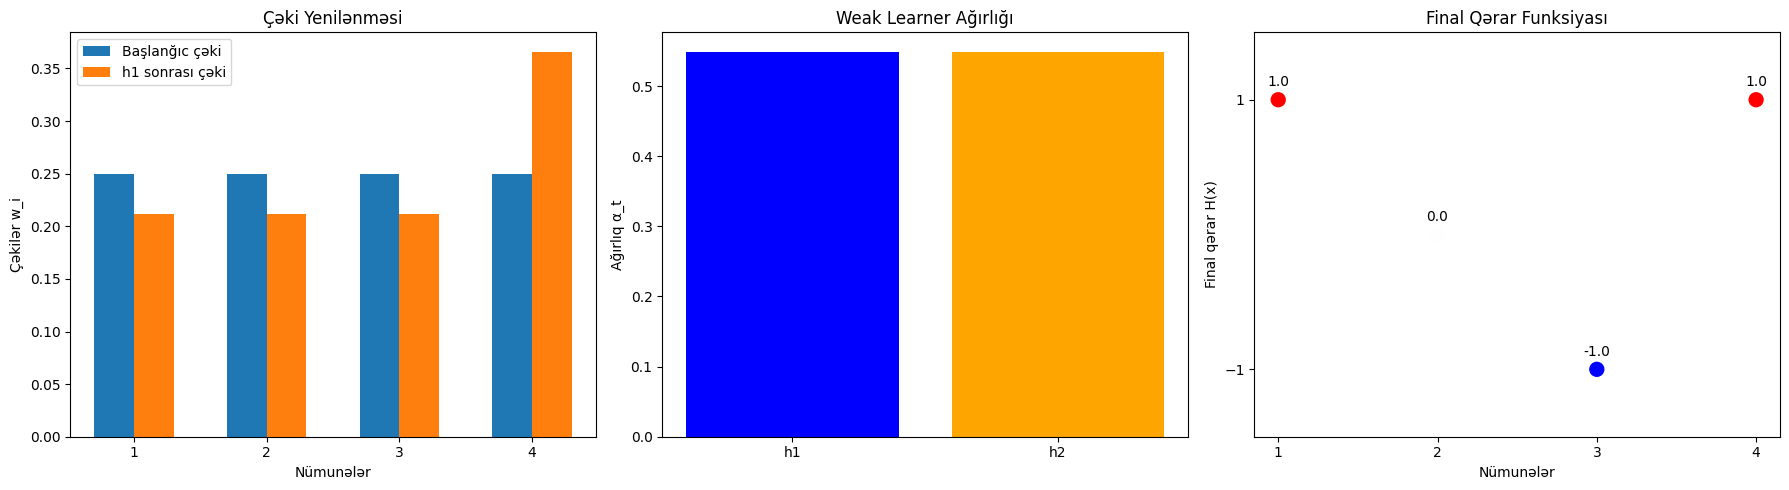

# **5. Adaboost Parametrləri və Onların Təsiri ⚙️**

Adaboostun performansı çox vaxt **parametrlərin düzgün seçilməsindən** asılıdır.

## **5.1 `n_estimators` (iteration sayı 🔢)**

- **n_estimators** – weak learnerlərin sayı, yəni iterasiya sayı.  
- Daha çox iterasiya → daha çox weak learner → potensial olaraq daha yaxşı performans.  
- Lakin çox yüksək dəyər → overfitting riski arta bilər.  
- Başlanğıc üçün 50-100 arası dəyər sınanır.  

## **5.2 `learning_rate` (çəki yenilənmə sürəti ⚡)**

- **learning_rate** – hər iterasiyada weak learnerin ağırlığının təsirini azaldır.  
- Formula: $\alpha_t \leftarrow \text{learning_rate} \cdot \alpha_t$  
- Kiçik learning_rate → hər weak learner daha az təsir göstərir → daha çox weak learner lazım olur.  
- Böyük learning_rate → sürətli öyrənmə, amma overfitting riski arta bilər.  
- **Əsas balans:** n_estimators və learning_rate bir-birini tamamlayır.

## **5.3 `algorithm` (SAMME vs SAMME.R 🔀)**

- **SAMME** – Discrete AdaBoost, klassik variant, weak learnerın çıxışını yalnız label olaraq istifadə edir.  
- **SAMME.R** – Real AdaBoost, weak learnerın **probalistic çıxışını** (məsələn, proba) istifadə edir → daha stabil və sürətli konvergensiya.  
- `SAMME.R` daha çox istifadə olunur.  


## **5.4 `base_estimator` (əsas weak learner 🌳)**

- **base_estimator** – weak learner növünü seçir.  
- Default: Decision Stump (`DecisionTreeClassifier(max_depth=1)`)  
- Digər nümunələr: deeper tree, SVM, perceptron  
- Weak learner nə qədər sadə olsa da, Adaboost onu **iterativ ağırlıqlı səsvermə** ilə güclü modelə çevirir.

## **5.5 Parametrlərin model performansına təsiri və tuning üsulları 🔧**

- **`n_estimators` və `learning_rate`** bir-biri ilə balanslaşdırılmalıdır.  
- **`base_estimator`** çox mürəkkəb olarsa → overfitting; çox sadə olarsa → öyrənmə zəif ola bilər.  
- **`algorithm`** seçimi → sürət və stabil performans üçün vacibdir.  
- **Tuning üsulları:**  
  - Grid Search: fərqli parametrləri sınayaraq optimal kombinasiyanı tapmaq  
  - Cross-Validation: overfitting riskini azaltmaq  
  - Learning curve analizi: iterasiya və learning_rate-in təsirini vizuallaşdırmaq  


- Adaboost-da default parametrlərlə başlanır, sonra **cross-validation ilə tənzimləmə** aparılır.  


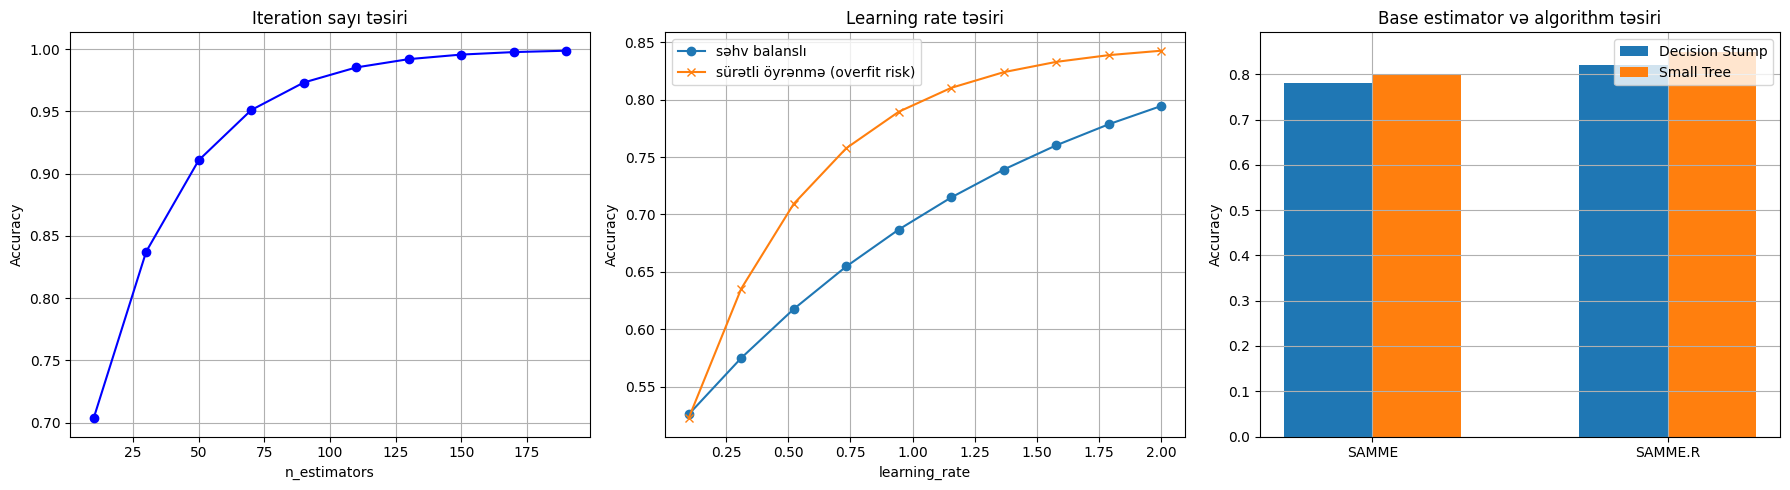

# **6. Adaboostun Üstünlükləri və Məhdudiyyətləri 🌟**

Adaboostun məşhurluğu onun **güclü performansı və zəif modellərlə işləmə qabiliyyətindən** gəlir. Amma hər üsul kimi bəzi məhdudiyyətləri də var.

## **6.1 Üstünlüklər ✅**

- **Overfitting-ə qarşı müqavimət**  
  - Sadə weak learnerlar birləşdirildikdə, Adaboost **overfitting riskini azaldır**.  
- **Səhvləri iterativ azaltma qabiliyyəti**  
  - Hər iterasiya əvvəlki səhvlərə fokuslanır və nəticədə model **ardıcıl olaraq səhvləri düzəldir**.  
- **Sadə weak learner ilə yüksək performans**  
  - Tək bir Decision Stump zəif ola bilər, amma Adaboost onu birləşdirərək **güclü və dəqiq model** yaradır.


## **6.2 Məhdudiyyətlər ⚠️**

- **Səs-küylü dataya həssaslıq**  
  - Çox səhv və təsadüfi nümunələr performansa mənfi təsir göstərə bilər.  
- **Çox böyük datasetlərdə yavaşlama**  
  - Hər iterasiya weak learnerləri təlim etdiyindən böyük datasetlərdə **hesablama vaxtı arta bilər**.  
- **Outlier-lərə həssaslıq**  
  - Outlier-lər yüksək çəki alır və iterativ prosesdə **modelin yönünü poza bilər**.  

💡 Praktik tövsiyə:  
- Data preprocessing və outlier-lərin yoxlanması Adaboost performansı üçün vacibdir.  


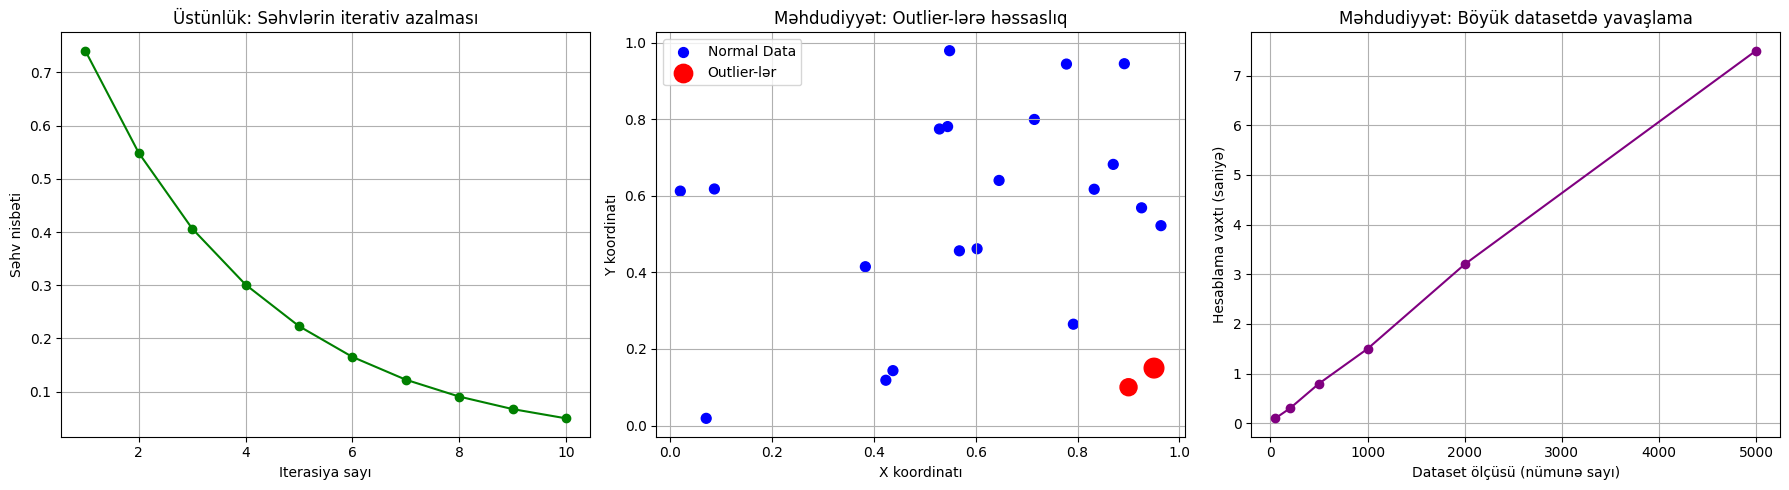

# **7. Adaboostun Variantları və Genişləndirilmiş Versiyaları ⚡**

Adaboost tək bir üsul deyil; müxtəlif variantları və genişləndirilmiş versiyaları mövcuddur. Onlar performans və sürət baxımından fərqlənir.

## **7.1 SAMME vs SAMME.R 🔀**

- **SAMME (Stagewise Additive Modeling using a Multi-class Exponential loss)**  
  - Discrete AdaBoost-un çoxklasslı variantıdır.  
  - Weak learnerın çıxışını yalnız label kimi istifadə edir.  
- **SAMME.R (Real AdaBoost)**  
  - Weak learnerın **probalistic çıxışını** istifadə edir.  
  - Daha sürətli konvergensiya və daha stabil nəticə verir.  
- **Praktik tövsiyə:**  
  - Çox vaxt `SAMME.R` daha üstün performans göstərir və Scikit-learn-da default olaraq istifadə olunur.

## **7.2 Real AdaBoost 🌐**

- Real AdaBoost SAMME.R ilə eyni prinsipdə işləyir: weak learnerlərin **probalistic çıxışları** istifadə olunur.  
- Fərq: **çəkilərin və ağırlıqların daha düzgün paylanması**  
- Nəticədə, səhvlərə adaptiv yanaşma daha yumşaq olur və iterativ öyrənmə **stabil şəkildə konvergensiya edir**.

## **7.3 Modifikasiyalar və yeni boosting üsulları 🚀**

- **Gradient Boosting**  
  - Adaboost prinsiplərini genişləndirərək **loss function minimizasiyasına** əsaslanır.  
  - Weak learnerlər iterativ olaraq **gradient descent ilə öyrədilir**.  
- **XGBoost (Extreme Gradient Boosting)**  
  - Gradient Boosting-in optimallaşdırılmış, sürətli və paralel versiyası.  
  - Overfitting-i azaltmaq üçün regularization tətbiq edir.  
- **LightGBM**  
  - Daha böyük datasetlər üçün optimallaşdırılmış boosting alqoritmi.  
  - Leaf-wise tree bölünməsi və histogram-based training ilə yüksək sürət təmin edir.  

  
💡 Adaboost zəif modelləri birləşdirir, amma Gradient Boosting və onun variantları daha **müasir və optimallaşdırılmış** boosting üsullarıdır.  


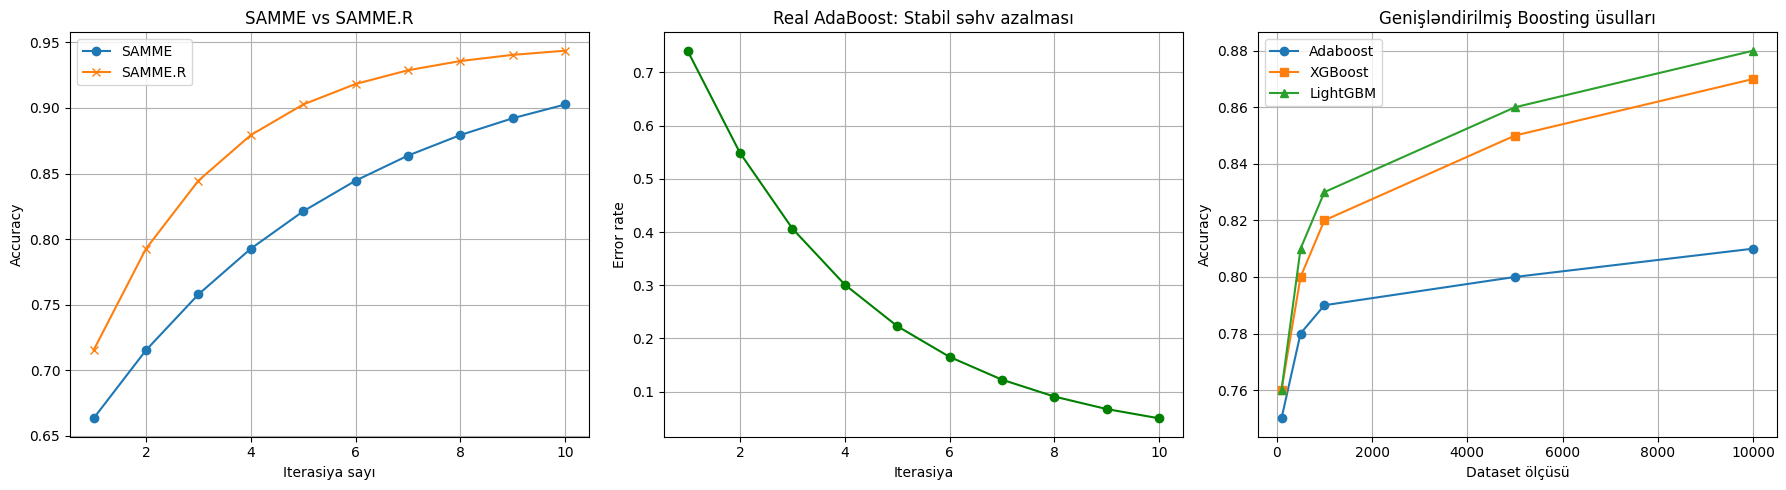

# **8. Performans Ölçülməsi və Evaluasiya 📊**

Adaboost və digər klassifikatorların performansını ölçmək üçün müxtəlif **metriklər və metodlar** istifadə olunur. Doğru ölçmə modelin güclü və zəif tərəflərini göstərir.

##**8.1 Accuracy, Precision, Recall, F1-score ✅**

- **Accuracy:**  
$$
\text{Accuracy} = \frac{\text{Düzgün təsniflər}}{\text{Cəmi nümunələr}}
$$  
- **Precision (Dəqiqlik):**  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$  
- **Recall (Həssaslıq):**  
$$
\text{Recall} = \frac{TP}{TP + FN}
$$  
- **F1-score:**  
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$  
💡 F1-score balanslı metrikdir, xüsusilə **imbalanced datasetlər** üçün vacibdir.

## **8.2 ROC-AUC və sinifləndirmə metrikləri 🎯**

- **ROC Curve:** True Positive Rate (TPR) vs False Positive Rate (FPR) qrafiki  
- **AUC (Area Under Curve):** 0.5 → təsadüfi, 1 → mükəmməl  
- Adaboost-da **probabilistic çıxış** istifadə olunarsa, ROC-AUC daha informativ olur.  
- Digər metriklər: confusion matrix, log-loss, specificity

## **8.3 Cross-validation ilə performans yoxlanışı 🔄**

- **K-Fold Cross-Validation:** Dataset $K$ hissəyə bölünür, hər hissə test, qalan hissələr train kimi istifadə olunur.  
- Məqsəd: **overfitting riskini azaltmaq** və modelin stabil performansını yoxlamaq.  
- Adaboostda cross-validation **n_estimators, learning_rate və base_estimator tuning** üçün geniş istifadə olunur.

## **8.4 Early stopping və overfitting riski ⏹️**

- Adaboost çox iterasiya etsə **overfitting** riski arta bilər.  
- **Early stopping:** validation metrikləri izlənir və performans yaxşılaşmadıqda iterasiya dayandırılır.  
- Praktik olaraq:  
  - 5-10 iterasiya ərzində performans artmırsa, training dayandırılır.  
- Bu üsul böyük datasetlərdə həm **sürəti artırır**, həm də overfitting-i azaldır.  


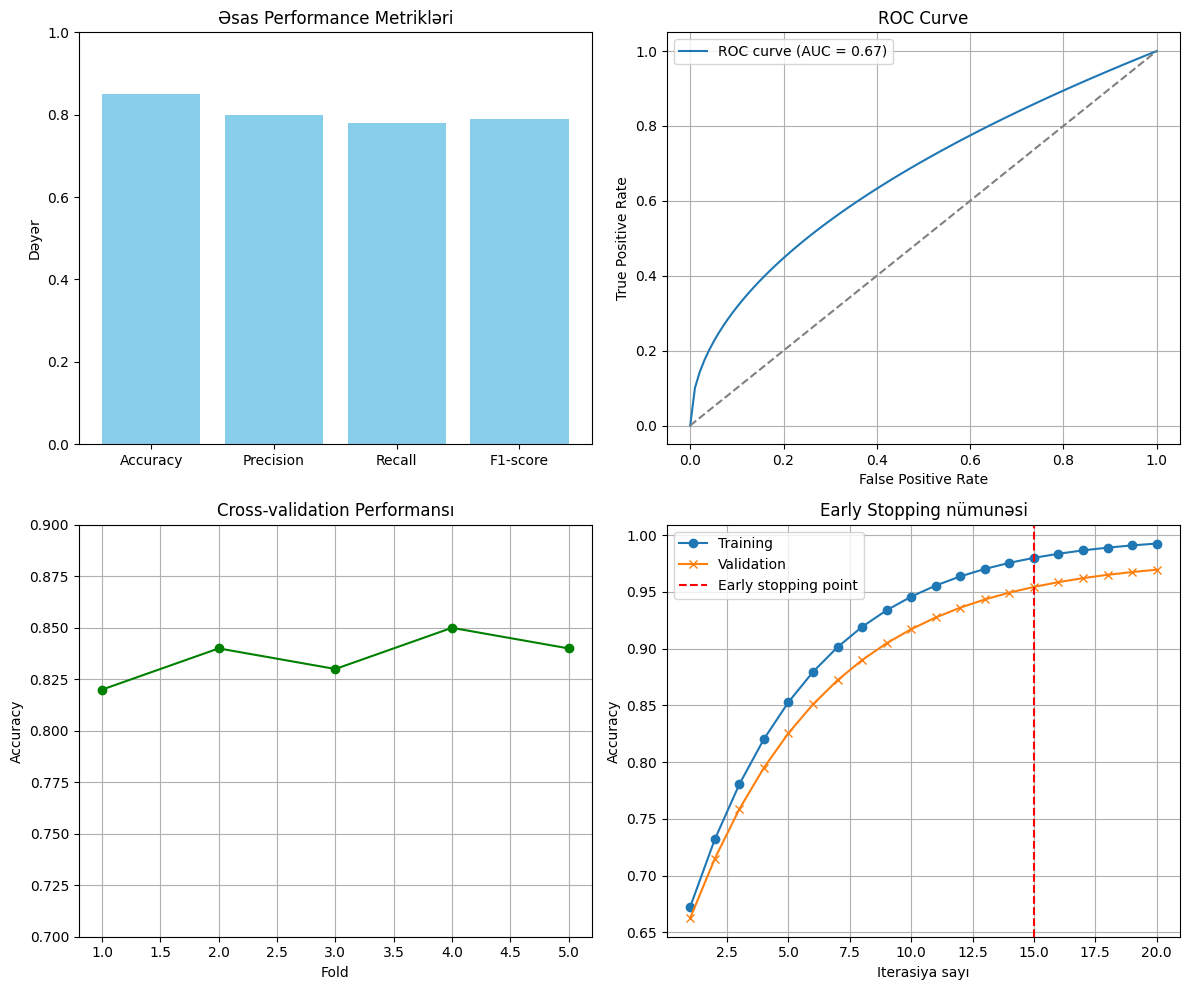

#**9. Praktik Tətbiq və İstifadə Nümunələri**


## **9.1 Binary Classification nümunələri 🔑**
Adaboost ən çox **binary classification** problemlərində tətbiq olunur.  
✨ Nümunələr:
- 📧 **Spam detection**: Email mesajlarının spam olub-olmamasını müəyyən etmək.
- 💳 **Fraud detection**: Kredit kartı əməliyyatlarında saxtakarlıq aşkarlanması.

➡️ Bu hallarda Adaboost iterativ şəkildə **səhv təsnif olunan nümunələrə daha çox diqqət** ayıraraq ümumi modeli gücləndirir.

## **9.2 Multi-class Classification tətbiqləri 🎯**
Adaboost yalnız binary deyil, **multi-class** problemlərə də tətbiq edilə bilər.  
⚙️ Bunun üçün adətən **SAMME** və ya **SAMME.R** variantları istifadə olunur.

📌 Nümunələr:
- 🖼️ **Şəkil təsnifatı** (məsələn, rəqəmlərin və ya obyektlərin tanınması).
- 📚 **Mətn təsnifatı** (müxtəlif kateqoriyalara bölünmə).

## **9.3 Sklearn ilə Adaboost implementasiyası 🛠️**
Adaboost-un praktik istifadəsi üçün **Scikit-learn** kitabxanası geniş imkanlar təqdim edir.  

⚡ Əsas parametrlər:
- 🔢 `n_estimators`: iterasiya sayı
- ⚖️ `learning_rate`: zəif öyrənicilərin çəkilərinə nəzarət
- 🌳 `base_estimator`: əsas zəif learner (məsələn, DecisionTreeClassifier)

## **9.4 Model interpretasiyası (feature importance) 🔍**
Adaboost yalnız yaxşı performans vermir, həm də **interpretasiya imkanları** təqdim edir.  

📊 İmkanlar:
- Hər bir xüsusiyyətin modelə təsiri **feature importance** vasitəsilə ölçülə bilər.  
- Bu, xüsusilə yüksək ölçülü datasetlərdə hansı dəyişənlərin daha əhəmiyyətli olduğunu anlamağa kömək edir.


#**10. Troubleshooting 🔧**

## **10.1 Modelin overfitting etməsi ⚠️**
Adaboost iterativ şəkildə səhvlərə fokuslandığı üçün bəzən **overfitting** edə bilər.  
📌 Nəticə: Model təlim datasına çox uyğunlaşır, testdə zəif performans göstərir.  


- `n_estimators` çox böyük seçilməməlidir.
- `learning_rate` dəyəri balanslı təyin olunmalıdır.
- Daha sadə weak learner istifadə etmək overfitting riskini azaldır.

## **10.2 Səs-küylü datasetlərlə iş 🎧**
Adaboost səhv təsnif olunan nümunələrə daha çox diqqət yetirdiyindən **səs-küylü data** ilə çətinlik çəkə bilər.  
📌 Problem: Model həqiqətən öyrənməyə dəyməyən “noise” nümunələr üzərində həddindən artıq öyrənə bilər.  


- Data cleaning və preprocessing mərhələsini düzgün aparmaq.
- Lazımi hallarda robust metodlardan (məsələn, Random Forest) istifadə etmək.
- `n_estimators` və `learning_rate` dəyərlərini diqqətlə seçmək.

## **10.3 Weak learner seçiminin əhəmiyyəti 🌱**
Adaboost-un gücü **weak learner** seçiminə bağlıdır.  
Ən çox istifadə olunan weak learner:
- 🌳 **Decision Stump** (yəni çox dayaz decision tree)

📌 Səbəb:
- Sadə weak learner → daha az overfitting
- Çox mürəkkəb weak learner → Adaboost-un əsas prinsipi pozula bilər.

## **10.4 Parametr tuning və grid search 🔧**
Adaboost-un effektivliyi parametrlərin düzgün seçilməsindən asılıdır.  
Əsas parametrlər:
- `n_estimators`
- `learning_rate`
- `base_estimator`-ın dərinliyi


- Parametr seçimi üçün **GridSearchCV** və ya **RandomizedSearchCV** istifadə etmək.
- Cross-validation ilə ən yaxşı parametrləri tapmaq.
- Sadə modellə başlamaq və tədricən mürəkkəbləşdirmək.


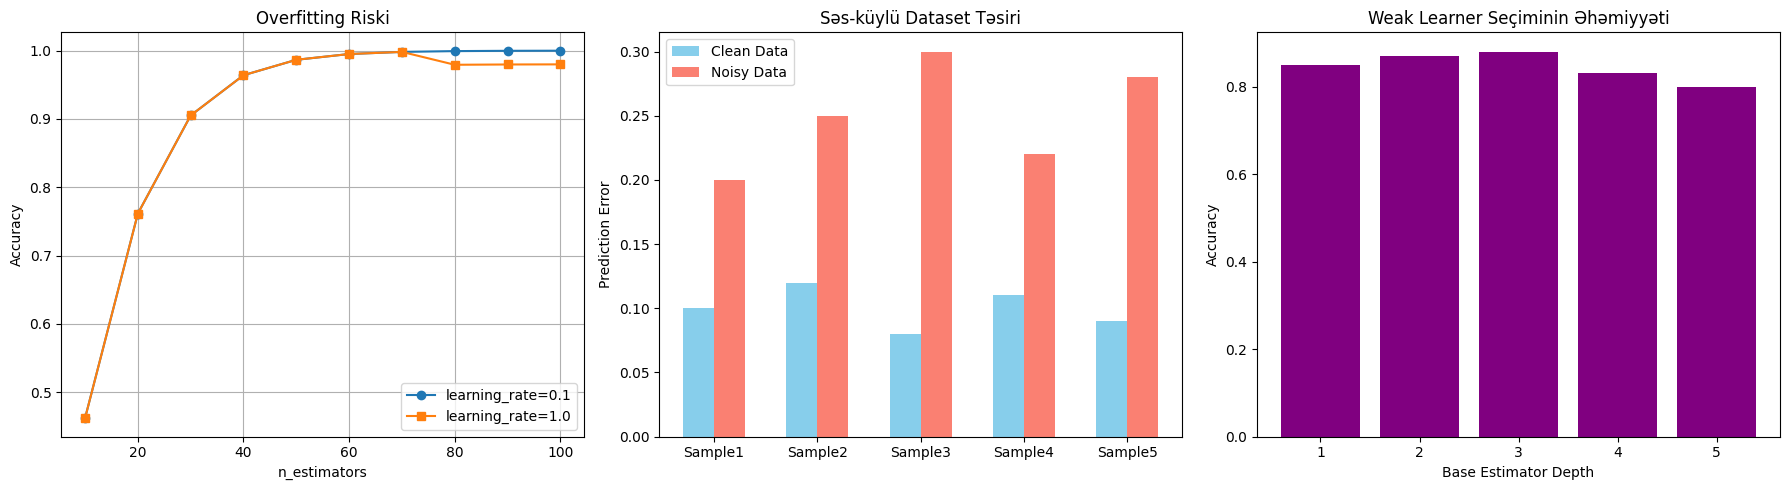